## 导数
对于一个函数$f(x)$ 则其在任一点x处的导数定义为:

$$f^{\prime}(x)=\lim _{h \rightarrow 0} \frac{f(x+h)-f(x)}{h}$$

该极限存在时 则称它在该点可导

几何意义：一元函数在某点处的导数即为在该点处的斜率

In [1]:
import numpy as np
from IPython import display
from d2l import torch as d2l

# 模拟求导f(x) = 3x^2-4x 求出f'(1)

def f(x): # 定义函数f(x)
    return 3 * x ** 2 - 4 * x


def numerical_lim(f, x, h): # 导数定义式
    return (f(x + h) - f(x)) / h

# 针对不同的增量h 求出在x=1出的导数值
h = 0.1
for i in range(5):
    print(f'h={h:.5f}, numerical limit={numerical_lim(f, 1, h):.5f}')
    h *= 0.1


h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


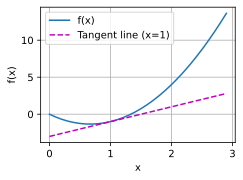

In [2]:
# 对导数的几何意义 利用matplotlib 图像化显示

# 设置一下matplotlib生成图形的属性

# 使用svg格式在Jupyter中显示绘图
def use_svg_display():  # @save 它是一个特殊的标记，会将对应的函数、类或语句保存在d2l包中 因此，以后无须重新定义就可以直接调用它们（例如，d2l.use_svg_display()）
    display.set_matplotlib_formats('svg')


# 设置matplotlib的图表大小
def set_figsize(figsize=(3.5, 2.5)):  # @save
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

# 设置绘制出的轴的属性
#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

# 综合以上三个函数 自定义plot函数简洁画图
#@save


def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """绘制数据点。"""
    if legend is None:
        legend = []

    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()

    # 如果 `X` 有一个轴，输出True
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)


# 利用封装好的来画图 f(x)= 3x^2-4x 以及在1点处的切线y = 2x-3
x = np.arange(0,3,0.1)
plot(x, [f(x), 2*x-3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])


## 偏导数
即对于多元函数 $y = f(x_1,x_2,...x_n)$ 沿某一个参数 $x_i$ 的导数,而其它变量看做常数求导即可，其定义式与一元函数基本类似：

$$
\frac{\partial y}{\partial x_{i}}=\lim _{h \rightarrow 0} \frac{f\left(x_{1}, \ldots, x_{i-1}, x_{i}+h, x_{i+1}, \ldots, x_{n}\right)-f\left(x_{1}, \ldots, x_{i}, \ldots, x_{n}\right)}{h}
$$




## 梯度

描述了一个向量，该向量内的元素为一个多元函数对其所有变量的偏导数：

$$
\nabla_{\mathbf{x}} f(\mathbf{x})=\left[\frac{\partial f(\mathbf{x})}{\partial x_{1}}, \frac{\partial f(\mathbf{x})}{\partial x_{2}}, \ldots, \frac{\partial f(\mathbf{x})}{\partial x_{n}}\right]
$$

## 偏导广义推论

- 若y为向量x的一个线性组合，则y对向量x求偏导$\partial y / \partial \mathbf{x}$：

    $$
    \mathbf{x}=\left[\begin{array}{c}
    x_{1} \\
    x_{2} \\
    \vdots \\
    x_{n}
    \end{array}\right] \quad \frac{\partial y}{\partial \mathbf{x}}=\left[\frac{\partial y}{\partial x_{1}}, \frac{\partial y}{\partial x_{2}}, \ldots, \frac{\partial y}{\partial x_{n}}\right]
    $$

    例如：
    $$
    \frac{\partial}{\partial \mathbf{x}} x_{1}^{2}+2 x_{2}^{2}=\left[2 x_{1}, 4 x_{2}\right]
    $$
    
    其中y可能就是常用的损失函数 向量x即为涉及到的变量
    **常用求导结论：**
    $$
    \begin{array}{c|cccc}
    y & a & a u & \operatorname{sum}(\mathbf{x}) & \|\mathbf{x}\|^{2} \\
    \hline \frac{\partial y}{\partial \mathbf{x}} & \mathbf{0}^{T} & a \frac{\partial u}{\partial \mathbf{x}} & \mathbf{1}^{T} & 2 \mathbf{x}^{T}
    \end{array}
    $$
    $$
    \begin{array}{c|cc}
    y & u+v & u v & \langle\mathbf{u}, \mathbf{v}\rangle \\
    \hline \frac{\partial y}{\partial \mathbf{x}} & \frac{\partial u}{\partial \mathbf{x}}+\frac{\partial v}{\partial \mathbf{x}} & \frac{\partial u}{\partial \mathbf{x}} v+\frac{\partial v}{\partial \mathbf{x}} u & \mathbf{u}^{T} \frac{\partial \mathbf{v}}{\partial \mathbf{x}}+\mathbf{v}^{T} \frac{\partial \mathbf{u}}{\partial \mathbf{x}}
    \end{array}
    $$

- $y$为向量，$x$为标量时$\partial \mathbf{y} / \partial x$:
    $$
    \mathbf{y}=\left[\begin{array}{c}
    y_{1} \\
    y_{2} \\
    \vdots \\
    y_{m}
    \end{array}\right] \quad \frac{\partial \mathbf{y}}{\partial x}=\left[\begin{array}{c}
    \frac{\partial y_{1}}{\partial x} \\
    \frac{\partial y_{2}}{\partial x} \\
    \vdots \\
    \frac{\partial y_{m}}{\partial x}
    \end{array}\right]
    $$
- $y$和$x$均为向量时$\partial \mathbf{y} / \partial \mathbf{x}$
    $$\mathbf{x}=\left[\begin{array}{c}x_{1} \\ x_{2} \\ \vdots \\ x_{n}\end{array}\right] \quad \mathbf{y}=\left[\begin{array}{c}y_{1} \\ y_{2} \\ \vdots \\ y_{m}\end{array}\right]$$

    $$\frac{\partial \mathbf{y}}{\partial \mathbf{x}}=\left[\begin{array}{c}\frac{\partial y_{1}}{\partial \mathbf{x}} \\ \frac{\partial y_{2}}{\partial \mathbf{x}} \\ \vdots \\ \frac{\partial y_{m}}{\partial \mathbf{x}}\end{array}\right]=\left[\begin{array}{c}\frac{\partial y_{1}}{\partial x_{1}}, \frac{\partial y_{1}}{\partial x_{2}}, \ldots, \frac{\partial y_{1}}{\partial x_{n}} \\ \frac{\partial y_{2}}{\partial x_{1}}, \frac{\partial y_{2}}{\partial x_{2}}, \ldots, \frac{\partial y_{2}}{\partial x_{n}} \\ \vdots \\ \frac{\partial y_{m}}{\partial x_{1}}, \frac{\partial y_{m}}{\partial x_{2}}, \ldots, \frac{\partial y_{m}}{\partial x_{n}}\end{array}\right]$$

    常用推论：
    $$
    \begin{aligned}
    &\begin{array}{c|cccc}
    \mathbf{y} & \mathbf{a} & \mathbf{x} & \mathbf{A} \mathbf{x} & \mathbf{x}^{T} \mathbf{A} \\
    \hline \frac{\partial \mathbf{y}}{\partial \mathbf{x}} & \mathbf{0} & \mathbf{I} & \mathbf{A} & \mathbf{A}^{T}
    \end{array}\\
    &\begin{array}{l|ll}
    \mathbf{y} & a \mathbf{u} & \mathbf{A} \mathbf{u} & \mathbf{u}+\mathbf{v} \\
    \hline \frac{\partial \mathbf{y}}{\partial \mathbf{x}} & a \frac{\partial \mathbf{u}}{\partial \mathbf{x}} & \mathbf{A} \frac{\partial \mathbf{u}}{\partial \mathbf{x}} & \frac{\partial \mathbf{u}}{\partial \mathbf{x}}+\frac{\partial \mathbf{v}}{\partial \mathbf{x}}
    \end{array}
    \end{aligned}
    $$


## 链式求导法则
即在求导过程中可以通过转化为对中间变量来简化求导运算

假设可微分函数 $y$ 有变量 $u_1,u_2,…,u_m$ ，其中每个可微分函数 $u_i$ 都有变量 $x_1,_x2,…,x_n$ 。注意， $y$ 是 $x_1,x_2，…,x_n$ 的函数。对于任意 $i = 1,2,…,n$ ，链式法则给出：

$$
\frac{d y}{d x_{i}}=\frac{d y}{d u_{1}} \frac{d u_{1}}{d x_{i}}+\frac{d y}{d u_{2}} \frac{d u_{2}}{d x_{i}}+\cdots+\frac{d y}{d u_{m}} \frac{d u_{m}}{d x_{i}}
$$

## 小结
> - 微分和积分是微积分的两个分支，其中前者可以应用于深度学习中无处不在的优化问题。
> - 导数可以被解释为函数相对于其变量的瞬时变化率。它也是函数曲线的切线的斜率。
> - 梯度是一个向量，其分量是多变量函数相对于其所有变量的偏导数
> - 链式法则使我们能够微分复合函数。

## 小练习

1. 绘制函数$y=f(x)=x^{3}-\frac{1}{x}$和其在$x=1$处切线的图像

<ipython-input-3-1966473e2c99>:2: RuntimeWarning: divide by zero encountered in true_divide
  plot(x, [x**3-1/x, 4*x-4], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])


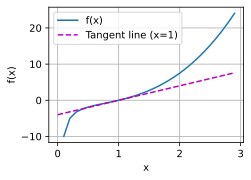

In [3]:
x = np.arange(0, 3, 0.1)
plot(x, [x**3-1/x, 4*x-4], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

2. 求函数$f(\mathbf{x})=3 x_{1}^{2}+5 e^{x_{2}}$的梯度
   
   解答: $\left[6 x_{1}, 5 e^{x 2}\right]$

3. 函数$f(\mathbf{x})=\|\mathbf{x}\|_{2}$的梯度是?
    
    解答：$2 \mathbf{x}^{T}$

4. 你可以写出函数 $u = f(x, y, z)$, 其中 $x = x(a, b), y = y(a, b), z = z(a, b)$ 的链式法则吗?
   解答：
$$
\begin{aligned}
\frac{d u}{d a} &=\frac{d u}{d x} \frac{d x}{d a}+\frac{d u}{d y} \frac{d y}{d a}+\frac{d u}{d z} \frac{d z}{d a} \\
\frac{d u}{d b} &=\frac{d u}{d x} \frac{d x}{d b}+\frac{d u}{d y} \frac{d y}{d b}+\frac{d u}{d z} \frac{d z}{d b}
\end{aligned}
$$

